In [ ]:
# https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/
# mount Google Drive so we can access it
from google.colab import drive
drive.mount('/content/gdrive')  # should be able to mount just UAV folder next time

Mounted at /content/gdrive


In [ ]:
# file paths to our data
!ls 'gdrive/Shareddrives/CPSC 4176 Project Spring 2023/UAV Data'

'Error evidence'	 'UAV 3 Information.txt'  'UAV 5.mp4'
'UAV 1 Data.xlsx'	 'UAV 3.mp4'		  'UAV 5 Road Layout.jpg'
'UAV 1 Information.txt'  'UAV 3 Road Layout.png'  'UAV 6 Data frenet.csv'
'UAV 1.mp4'		  UAV_4_Data_down.xlsx	  'UAV 6 Data pixel.csv'
'UAV 1 Road Layout.png'   UAV_4_Data_up.xlsx	  'UAV 6 Information.txt'
'UAV 2 Data.xlsx'	 'UAV 4 Information.txt'  'UAV 6.mp4'
'UAV 2 Information.txt'  'UAV 4.mp4'		  'UAV 6 Road Layout.png'
'UAV 2.mp4'		 'UAV 4 Road Layout.jpg'  'UAV 6 timespace data.jpg'
'UAV 2 Road Layout.png'  'UAV 5 Data.xlsx'
'UAV 3 Data.xlsx'	 'UAV 5 Information.txt'


In [ ]:
from tensorflow import keras
import pandas as pd

In [ ]:
url = "gdrive/Shareddrives/CPSC 4176 Project Spring 2023/UAV Data/UAV_4_Data_down.xlsx"
data = pd.read_excel(url)

In [ ]:
# since each sheet is it's own lane, we can remove LaneID
data = data.drop(labels='LaneID', axis=1)

In [ ]:
data.shape

(472241, 9)

In [ ]:
print(data["x-axis position(m)"].max())


356.9378329610643


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:title={'center':'All Vehicles Lane 1'}, xlabel='Time(s)'>

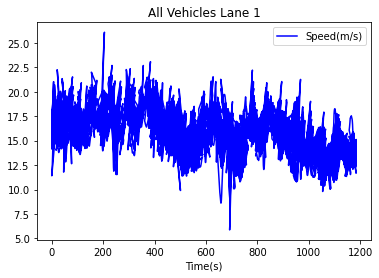

In [ ]:
# displays all vehicles speed and times for Lane 1
data.plot(kind='line', x='Time(s)', y='Speed(m/s)', color='blue', title="All Vehicles Lane 1")

In [ ]:
data.describe()

,VehicleID,Time(s),x-axis position(m),Distance from upper Lane line(m),Distance from lower lane line(m),Speed(m/s),Acceleration(m/s^2),VehicleLength(meter),VehicleWidth(meter)
count,472241.000000,472241.000000,472241.000000,472241.000000,472241.000000,472241.000000,472241.000000,472241.000000,472241.000000
mean,7722.995307,643.954218,176.489404,1.073805,2.396374,15.534686,0.051822,4.713806,1.987773
std,4403.863299,342.917703,100.107767,0.739096,0.739641,2.109024,0.556531,0.845099,0.182131
min,7.000000,0.033330,2.850000,0.000086,0.000043,5.870939,-137.975116,2.754520,1.671649
25%,3867.000000,365.630100,90.918935,0.644734,2.300842,13.986247,-0.106993,4.419687,1.910639
50%,7903.000000,664.000260,175.203786,0.843645,2.597841,15.515943,0.053256,4.624441,1.971921
75%,11666.000000,951.538170,261.556895,1.147320,2.831879,16.961809,0.213985,4.807496,2.029756
max,15133.000000,1184.714850,356.937833,3.748858,3.703976,26.082532,137.574735,13.205000,3.610000


In [ ]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,472231,472232,472233,472234,472235,472236,472237,472238,472239,472240
VehicleID,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,1.513300e+04,15133.000000,1.513300e+04,1.513300e+04,15133.000000,15133.000000,15133.000000,15133.000000,1.513300e+04,1.513300e+04
Time(s),0.033330,0.066660,0.099990,0.133320,0.166650,0.199980,0.233310,0.266640,0.299970,0.333300,...,1.184415e+03,1184.448210,1.184482e+03,1.184515e+03,1184.548200,1184.581530,1184.614860,1184.648190,1.184682e+03,1.184715e+03
x-axis position(m),292.885000,293.456967,294.029097,294.601385,295.173879,295.746599,296.319537,296.892789,297.466214,298.039906,...,1.194087e+01,12.369247,1.279762e+01,1.322600e+01,13.654372,14.082747,14.511122,14.939497,1.536787e+01,1.579625e+01
Distance from upper Lane line(m),1.516244,1.523727,1.531513,1.539330,1.547176,1.554925,1.562819,1.570735,1.578362,1.585669,...,8.013364e-01,0.798675,7.960128e-01,7.933509e-01,0.790689,0.788027,0.785365,0.782704,7.800418e-01,7.773800e-01
Distance from lower lane line(m),2.058017,2.049199,2.040078,2.030925,2.021743,2.012658,2.003426,1.994173,1.984784,1.975488,...,2.451660e+00,2.457393,2.463125e+00,2.468858e+00,2.474591,2.480324,2.486057,2.491789,2.497522e+00,2.503255e+00
Speed(m/s),17.160722,17.165635,17.170339,17.176544,17.183327,17.189838,17.199288,17.204459,17.212508,17.217996,...,1.285253e+01,12.852532,1.285253e+01,1.285253e+01,12.852532,12.852532,12.852532,12.852532,1.285253e+01,1.285253e+01
Acceleration(m/s^2),0.147550,0.141271,0.186334,0.203683,0.195536,0.283771,0.155283,0.241708,0.164824,0.158830,...,-1.600321e-12,0.000000,1.600321e-12,-1.600321e-12,0.000000,0.000000,0.000000,0.000000,-2.633009e-09,2.633009e-09
VehicleLength(meter),5.101913,5.101913,5.101913,5.101913,5.101913,5.101913,5.101913,5.101913,5.101913,5.101913,...,4.901486e+00,4.901486,4.901486e+00,4.901486e+00,4.901486,4.901486,4.901486,4.901486,4.901486e+00,4.901486e+00
VehicleWidth(meter),2.058609,2.058609,2.058609,2.058609,2.058609,2.058609,2.058609,2.058609,2.058609,2.058609,...,1.992432e+00,1.992432,1.992432e+00,1.992432e+00,1.992432,1.992432,1.992432,1.992432,1.992432e+00,1.992432e+00


In [ ]:
# counts and displays how many datapoints per vehicle
vehicle_datapoints = {}
for vehicle in data['VehicleID']:
  vehicle_datapoints[vehicle] = vehicle_datapoints.get(vehicle, 0) + 1
vehicle_datapoints

{7: 107,
 13: 131,
 21: 26,
 24: 506,
 25: 463,
 29: 63,
 40: 104,
 41: 209,
 49: 602,
 50: 377,
 53: 445,
 60: 307,
 75: 647,
 77: 61,
 85: 600,
 135: 628,
 141: 155,
 159: 192,
 167: 561,
 180: 567,
 191: 575,
 203: 208,
 224: 460,
 233: 185,
 239: 700,
 253: 728,
 319: 376,
 323: 662,
 332: 68,
 355: 631,
 365: 626,
 374: 623,
 402: 442,
 407: 599,
 416: 323,
 434: 219,
 468: 577,
 471: 456,
 486: 690,
 497: 690,
 518: 472,
 525: 613,
 543: 646,
 556: 394,
 564: 615,
 585: 570,
 611: 568,
 625: 75,
 653: 556,
 674: 226,
 713: 599,
 735: 597,
 747: 100,
 763: 414,
 767: 554,
 786: 595,
 812: 598,
 846: 613,
 851: 76,
 853: 495,
 867: 224,
 881: 439,
 912: 655,
 923: 648,
 939: 657,
 947: 501,
 958: 620,
 976: 619,
 982: 640,
 996: 651,
 1005: 651,
 1031: 619,
 1033: 325,
 1076: 620,
 1082: 479,
 1098: 591,
 1108: 449,
 1119: 675,
 1121: 407,
 1138: 152,
 1146: 724,
 1152: 228,
 1156: 706,
 1203: 641,
 1230: 80,
 1240: 448,
 1241: 609,
 1269: 249,
 1292: 642,
 1297: 646,
 1311: 650,
 

In [ ]:
#print(data['VehicleID'].unique())
uniqueIDList=data['VehicleID'].unique()
print(uniqueIDList[0])

#for vehicle in data['VehicleID']:
  #current_vehicleID=vehicle

7


In [ ]:
# searches for specific VehicleID and extracts all data for that vehicle
search_vehicle_id = 13909
vehicle_data = data.loc[data['VehicleID'] == search_vehicle_id]
vehicle_data

,VehicleID,Time(s),x-axis position(m),Distance from upper Lane line(m),Distance from lower lane line(m),Speed(m/s),Acceleration(m/s^2),VehicleLength(meter),VehicleWidth(meter)
433090,13909,1097.82354,3.230000,0.666967,2.523576,12.508598,-0.067542,4.168776,1.965493
433091,13909,1097.85687,3.646912,0.665265,2.528267,12.506349,-0.065788,4.168776,1.965493
433092,13909,1097.89020,4.063748,0.663626,2.532895,12.504158,-0.064101,4.168776,1.965493
433093,13909,1097.92353,4.480512,0.662043,2.537465,12.502024,-0.070217,4.168776,1.965493
433094,13909,1097.95686,4.897204,0.660512,2.541983,12.499686,-0.060820,4.168776,1.965493
...,...,...,...,...,...,...,...,...,...
433893,13909,1124.58753,352.199367,0.891840,2.682789,15.645186,0.102855,4.168776,1.965493
433894,13909,1124.62086,352.720821,0.892291,2.683563,15.648611,0.105459,4.168776,1.965493
433895,13909,1124.65419,353.242389,0.892797,2.684284,15.652123,0.116001,4.168776,1.965493
433896,13909,1124.68752,353.764074,0.893283,2.685024,15.655985,0.087254,4.168776,1.965493


In [ ]:
data.loc[data['VehicleID'] == 7]

,VehicleID,Time(s),x-axis position(m),Distance from upper Lane line(m),Distance from lower lane line(m),Speed(m/s),Acceleration(m/s^2),VehicleLength(meter),VehicleWidth(meter)
0,7,0.03333,292.885000,1.516244,2.058017,17.160722,0.147550,5.101913,2.058609
1,7,0.06666,293.456967,1.523727,2.049199,17.165635,0.141271,5.101913,2.058609
2,7,0.09999,294.029097,1.531513,2.040078,17.170339,0.186334,5.101913,2.058609
3,7,0.13332,294.601385,1.539330,2.030925,17.176544,0.203683,5.101913,2.058609
4,7,0.16665,295.173879,1.547176,2.021743,17.183327,0.195536,5.101913,2.058609
...,...,...,...,...,...,...,...,...,...
102,7,3.43299,352.505062,2.419873,1.155564,17.936791,0.134718,5.101913,2.058609
103,7,3.46632,353.102895,2.432782,1.144061,17.941277,0.215080,5.101913,2.058609
104,7,3.49965,353.700878,2.445891,1.132359,17.948439,0.173093,5.101913,2.058609
105,7,3.53298,354.299099,2.459206,1.120450,17.954203,0.180459,5.101913,2.058609


<AxesSubplot:title={'center':'Vehicle: 13909'}, xlabel='Time(s)'>

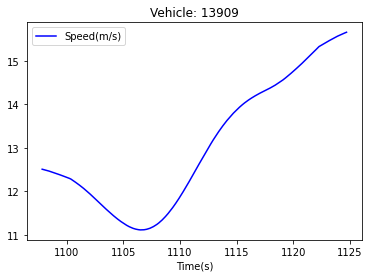

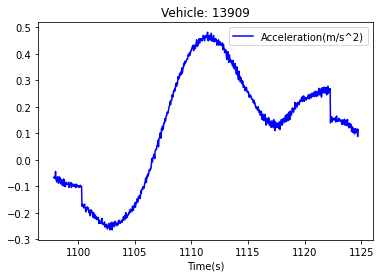

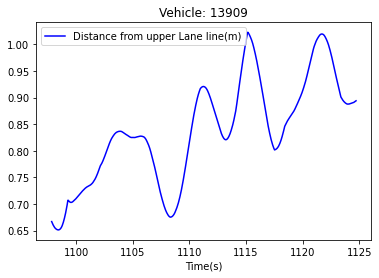

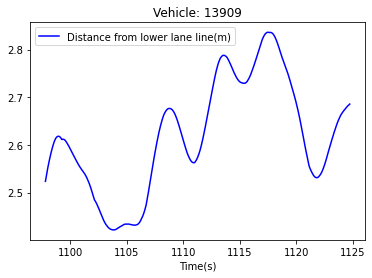

In [ ]:
# plots individual vehicle speed, acceleration, lane position
vehicle_data.plot(kind='line', x='Time(s)', y='Speed(m/s)', color='blue', title="Vehicle: " + str(search_vehicle_id))
vehicle_data.plot(kind='line', x='Time(s)', y='Acceleration(m/s^2)', color='blue', title="Vehicle: " + str(search_vehicle_id))
vehicle_data.plot(kind='line', x='Time(s)', y='Distance from upper Lane line(m)', color='blue', title="Vehicle: " + str(search_vehicle_id))
vehicle_data.plot(kind='line', x='Time(s)', y='Distance from lower lane line(m)', color='blue', title="Vehicle: " + str(search_vehicle_id))

In [ ]:
# removed feature values to keep initial model simple
vehicle_data = vehicle_data.drop(labels='Distance from upper Lane line(m)', axis=1)
vehicle_data = vehicle_data.drop(labels='Distance from lower lane line(m)', axis=1)
vehicle_data = vehicle_data.drop(labels='VehicleLength(meter)', axis=1)
vehicle_data = vehicle_data.drop(labels='VehicleWidth(meter)', axis=1)
vehicle_data = vehicle_data.drop(labels='x-axis position(m)', axis=1)
vehicle_data = vehicle_data.drop(labels='VehicleID', axis=1)
vehicle_data = vehicle_data.reset_index()
vehicle_data = vehicle_data.drop(labels='index', axis=1)
vehicle_data

,Time(s),Speed(m/s),Acceleration(m/s^2)
0,1097.82354,12.508598,-0.067542
1,1097.85687,12.506349,-0.065788
2,1097.89020,12.504158,-0.064101
3,1097.92353,12.502024,-0.070217
4,1097.95686,12.499686,-0.060820
...,...,...,...
803,1124.58753,15.645186,0.102855
804,1124.62086,15.648611,0.105459
805,1124.65419,15.652123,0.116001
806,1124.68752,15.655985,0.087254


In [ ]:
# We need to normalize the data between 0 and 1
# data' is normalized between 0 and 1
# data' = (data - data_min) / (data_max - data_min)
# OR 
# data' = (data - mean) / standard deviation         
# Ex:  train_array = (train_array - mean) / std

def NormalizeData(data):
  return (data - np.min(data)) / (np.max(data) - np.min(data))
def NormalizeData2(data):
  return (data - data.mean(axis=0)) / data.std(axis=0)

normalize_data = pd.DataFrame()
normalize_data['Time'] = vehicle_data['Time(s)']
normalize_data['Speed'] = NormalizeData(vehicle_data['Speed(m/s)'])
normalize_data['Acceleration'] = NormalizeData(vehicle_data['Acceleration(m/s^2)'])

normalize_data2 = pd.DataFrame()
normalize_data2['Time'] = vehicle_data['Time(s)']
normalize_data2['Speed'] = NormalizeData2(vehicle_data['Speed(m/s)'])
normalize_data2['Acceleration'] = NormalizeData2(vehicle_data['Acceleration(m/s^2)'])

# TODO: Need to clean the data, IE: -5.whatever, and other incorrect data

In [ ]:
#data['Time(s)'][data.index]
#data.shape[0] # This will return the last index. Do -1 this value to stop before the last.

print(type(data.shape[0]))
print(data["Speed(m/s)"][data.index[0]])
print(data[["Speed(m/s)","Acceleration(m/s^2)"]])

<class 'int'>
17.160721511071298
        Speed(m/s)  Acceleration(m/s^2)
0        17.160722         1.475500e-01
1        17.165635         1.412713e-01
2        17.170339         1.863339e-01
3        17.176544         2.036830e-01
4        17.183327         1.955357e-01
...            ...                  ...
472236   12.852532         0.000000e+00
472237   12.852532         0.000000e+00
472238   12.852532         0.000000e+00
472239   12.852532        -2.633009e-09
472240   12.852532         2.633009e-09

[472241 rows x 2 columns]


In [ ]:
# DATA CLEANING/PREP SECTION [ PRE-NORMALIZATION]
def clean_speed_accel(inputData):
  timeConstant = 0.03333
  #inputData[]

clean_file = data.copy()
clean_file["Speed(m/s)"]


'''
normalized_file = pd.DataFrame()
normalized_file['VehicleID'] = data['VehicleID']
normalized_file['LaneID'] = data['LaneID']
normalized_file['Time(s)'] = data['Time(s)']
normalized_file['x-axis position(m)'] = NormalizeData(data['x-axis position(m)'])
'''

"\nnormalized_file = pd.DataFrame()\nnormalized_file['VehicleID'] = data['VehicleID']\nnormalized_file['LaneID'] = data['LaneID']\nnormalized_file['Time(s)'] = data['Time(s)']\nnormalized_file['x-axis position(m)'] = NormalizeData(data['x-axis position(m)'])\n"

In [ ]:
# display min/max normalization
print("Max Speed: ", vehicle_data['Speed(m/s)'].max(), "Min Speed: ", vehicle_data['Speed(m/s)'].min())
print("Max Accel: ", vehicle_data['Acceleration(m/s^2)'].max(),"Min Accel: ",  vehicle_data['Acceleration(m/s^2)'].min())
print("Max Speed: ", normalize_data['Speed'].max(), "Min Speed: ", normalize_data['Speed'].min())
print("Max Accel: ", normalize_data['Acceleration'].max(),"Min Accel: ",  normalize_data['Acceleration'].min())
normalize_data

Max Speed:  15.658891018909252 Min Speed:  11.112446958988873
Max Accel:  0.48095757666038097 Min Accel:  -0.26493425834897844
Max Speed:  1.0 Min Speed:  0.0
Max Accel:  1.0 Min Accel:  0.0


,Time,Speed,Acceleration
0,1097.82354,0.307086,0.264639
1,1097.85687,0.306592,0.266991
2,1097.89020,0.306110,0.269252
3,1097.92353,0.305640,0.261053
4,1097.95686,0.305126,0.273652
...,...,...,...
803,1124.58753,0.996985,0.493087
804,1124.62086,0.997739,0.496578
805,1124.65419,0.998511,0.510712
806,1124.68752,0.999361,0.472171


In [ ]:
# display mean/standard deviation normalization
# this doesn't scale to 0 to 1, unsure of why
print("Max Speed: ", vehicle_data['Speed(m/s)'].max(), "Min Speed: ", vehicle_data['Speed(m/s)'].min())
print("Max Accel: ", vehicle_data['Acceleration(m/s^2)'].max(),"Min Accel: ",  vehicle_data['Acceleration(m/s^2)'].min())
print("Max Speed: ", normalize_data2['Speed'].max(), "Min Speed: ", normalize_data2['Speed'].min())
print("Max Accel: ", normalize_data2['Acceleration'].max(),"Min Accel: ",  normalize_data2['Acceleration'].min())
normalize_data2

Max Speed:  15.658891018909252 Min Speed:  11.112446958988873
Max Accel:  0.48095757666038097 Min Accel:  -0.26493425834897844
Max Speed:  1.7667936346080502 Min Speed:  -1.3179871512857533
Max Accel:  1.6598387241999657 Min Accel:  -1.7439176660957867


,Time,Speed,Acceleration
0,1097.82354,-0.370693,-0.843151
1,1097.85687,-0.372219,-0.835145
2,1097.89020,-0.373705,-0.827448
3,1097.92353,-0.375154,-0.855358
4,1097.95686,-0.376740,-0.812473
...,...,...,...
803,1124.58753,1.757495,-0.065571
804,1124.62086,1.759818,-0.053688
805,1124.65419,1.762201,-0.005580
806,1124.68752,1.764822,-0.136764


In [ ]:
# TODO: Now that data is normalized, make it into a RNN model
# Need to split into train, val, test
df_size = len(vehicle_data)
train_size = 0.7
val_size = 0.2
test_size = 0.1

train_df = vehicle_data[0:int(df_size * 0.7)]
val_df = vehicle_data[int(df_size * 0.7):int(df_size * 0.9)]
test_df = vehicle_data[int(df_size * 0.9):]
train_df

,Time(s),Speed(m/s),Acceleration(m/s^2)
0,1097.82354,12.508598,-0.067542
1,1097.85687,12.506349,-0.065788
2,1097.89020,12.504158,-0.064101
3,1097.92353,12.502024,-0.070217
4,1097.95686,12.499686,-0.060820
...,...,...,...
560,1116.48834,14.171889,0.171188
561,1116.52167,14.177589,0.163036
562,1116.55500,14.183018,0.158961
563,1116.58833,14.188312,0.130429


In [ ]:
'''
# just examples of how to build a model 
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()
'''

NameError: ignored

In [ ]:
'''
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()
'''